In [1]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 46
pd.options.display.max_rows = 50

In [2]:
cars = pd.read_csv('D:\\UW\\2nd semester\\ML\\Project\\cars.csv', sep = ',')
cars.columns = cars.columns.str.replace(" ", "_")
print(cars.shape)
print(cars.dtypes)

(45787, 19)
Unnamed:_0          int64
Body_Type          object
Condition          object
Cylinders           int64
Engine            float64
Exterior_Color     object
For_Sale_By        object
Interior_Color     object
Make               object
Mileage           float64
Model              object
Price               int64
Transmission       object
Vehicle_Title      object
Warranty           object
Year                int64
Drive_Type         object
Fuel_Type          object
Turbo              object
dtype: object


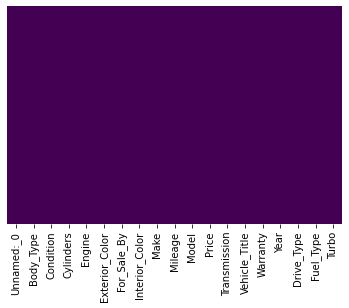

In [3]:
sns.heatmap(cars.isnull(), yticklabels=False, cbar=False, cmap='viridis')

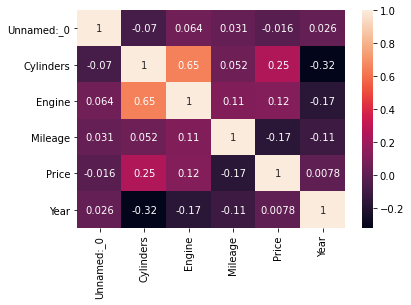

In [4]:
sns.heatmap(cars.corr(), annot=True)

In [5]:
cars = cars.drop(['Unnamed:_0', 'Model'], axis=1)

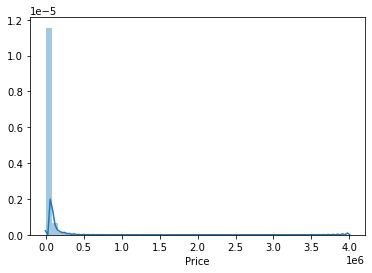

In [6]:
sns.distplot(cars['Price'], kde=True)

In [7]:
print(cars['Price'].mean())
print(cars['Price'].std())
print('Outliers border :',cars['Price'].mean() + cars['Price'].std())

39382.55402188394
65001.13097501399
Outliers border : 104383.68499689794


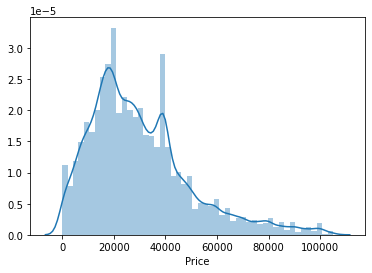

In [8]:
sns.distplot(cars.loc[cars['Price']<105000, 'Price'], kde=True)

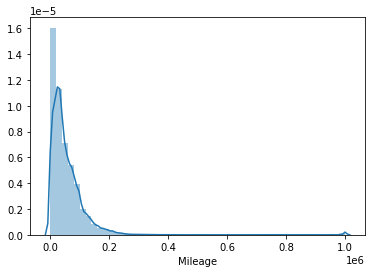

In [9]:
sns.distplot(cars['Mileage'], kde=True)

In [10]:
print(cars['Mileage'].mean())
print(cars['Mileage'].std())
print('Outliers border :',cars['Mileage'].mean() + cars['Mileage'].std()*3)

50879.341388765366
68891.47773385601
Outliers border : 257553.7745903334


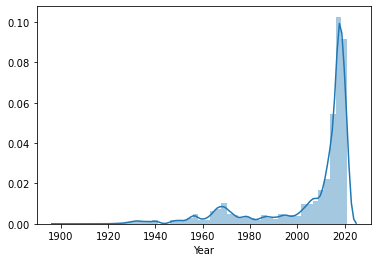

In [11]:
sns.distplot(cars['Year'], kde=True)

In [12]:
cars_lim = cars.loc[cars['Price']<=105000, ]
cars_lim = cars_lim.loc[cars_lim['Mileage']<=260000, ]
cars_lim = cars_lim.loc[cars_lim['Year']>=2000, ]

In [13]:
y = cars_lim.loc[:,cars_lim.columns== 'Price']
x = cars_lim.loc[:,cars_lim.columns!= 'Price']
x = pd.get_dummies(x, drop_first = True)
x

,Cylinders,Engine,Mileage,Year,Body_Type_Coupe,Body_Type_Other,Body_Type_Pickup,Body_Type_SUV,Body_Type_Sedan,Body_Type_Van,Body_Type_Wagon,Condition_Used,Exterior_Color_Blue,Exterior_Color_Gray,Exterior_Color_Green,Exterior_Color_Other,Exterior_Color_Red,Exterior_Color_Silver,Exterior_Color_White,For_Sale_By_Private Owner,Interior_Color_Brown,Interior_Color_Gray,Interior_Color_Other,Interior_Color_Red,Interior_Color_Tan,Make_BMW,Make_Cadillac,Make_Chevrolet,Make_Dodge,Make_Ford,Make_GMC,Make_Lexus,Make_Mercedes-Benz,Make_Other,Make_Porsche,Make_Ram,Make_Toyota,Transmission_Manual,Vehicle_Title_Other,Warranty_Yes,Drive_Type_AWD,Fuel_Type_Gasoline,Fuel_Type_Other,Turbo_Yes
41,6,2.0,77220.0,2007,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
42,6,3.5,81795.0,2009,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
43,4,2.3,80067.0,2008,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
44,4,2.3,108554.0,2007,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
45,6,3.5,40552.0,2017,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45782,8,6.7,81541.0,2015,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
45783,4,2.5,53022.0,2014,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45784,8,5.0,58127.0,2019,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
45785,8,5.0,1930.0,2020,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 999)
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train)

0.519801092969816

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(model, x_test, y_test, scoring='r2', cv=folds)
print(scores)
scores.mean()  

[0.51972231 0.55075683 0.52035663 0.46446691 0.54135905 0.50431373
 0.52286386 0.49590489 0.52947423 0.52281055]


0.517202898413546

In [16]:
x.columns

Index(['Cylinders', 'Engine', 'Mileage', 'Year', 'Body_Type_Coupe',
       'Body_Type_Other', 'Body_Type_Pickup', 'Body_Type_SUV',
       'Body_Type_Sedan', 'Body_Type_Van', 'Body_Type_Wagon', 'Condition_Used',
       'Exterior_Color_Blue', 'Exterior_Color_Gray', 'Exterior_Color_Green',
       'Exterior_Color_Other', 'Exterior_Color_Red', 'Exterior_Color_Silver',
       'Exterior_Color_White', 'For_Sale_By_Private Owner',
       'Interior_Color_Brown', 'Interior_Color_Gray', 'Interior_Color_Other',
       'Interior_Color_Red', 'Interior_Color_Tan', 'Make_BMW', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Dodge', 'Make_Ford', 'Make_GMC', 'Make_Lexus',
       'Make_Mercedes-Benz', 'Make_Other', 'Make_Porsche', 'Make_Ram',
       'Make_Toyota', 'Transmission_Manual', 'Vehicle_Title_Other',
       'Warranty_Yes', 'Drive_Type_AWD', 'Fuel_Type_Gasoline',
       'Fuel_Type_Other', 'Turbo_Yes'],
      dtype='object')

In [17]:
from scipy import stats
from sklearn import feature_selection

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

minfos=[]
for var in x.columns:
    print("\n", var)
    print("Pearson", stats.pearsonr(x[var], y['Price'].values))
    print("Mutual info", feature_selection.mutual_info_regression(x[var].values.reshape(-1,1), y['Price'].values))
    minfos.append(feature_selection.mutual_info_classif(x[var].values.reshape(-1,1), y['Price'].values))
    print("Chi2", feature_selection.chi2(x[var].values.reshape(-1,1),y['Price'].values))
    print("Anova", feature_selection.f_classif(x[var].values.reshape(-1,1), y['Price'].values))

imp = []
imp = list(zip(minfos, x.columns))
imp.sort(reverse=True)
imp


 Cylinders
Pearson (0.31779655812827023, 0.0)
Mutual info [0.21259825]
Chi2 (array([9603.62627729]), array([1.08963077e-53]))
Anova (array([2.80112982]), array([0.]))

 Engine
Pearson (0.2637775761700595, 0.0)
Mutual info [0.48517225]
Chi2 (array([12684.46364748]), array([9.67221097e-267]))
Anova (array([3.42388283]), array([0.]))

 Mileage
Pearson (-0.4387777122547136, 0.0)
Mutual info [0.67773133]
Chi2 (array([7.07131569e+08]), array([0.]))
Anova (array([3.60879537]), array([0.]))

 Year
Pearson (0.36510509920360545, 0.0)
Mutual info [0.31976336]
Chi2 (array([195.4049768]), array([1.]))
Anova (array([3.84386522]), array([0.]))

 Body_Type_Coupe
Pearson (0.13201001876158047, 1.4305594091827238e-131)
Mutual info [0.01995274]
Chi2 (array([9635.79039083]), array([3.38886159e-55]))
Anova (array([1.5513937], dtype=float32), array([0.], dtype=float32))

 Body_Type_Other
Pearson (0.04501386390512131, 1.129055536935823e-16)
Mutual info [0.02335539]
Chi2 (array([10618.06864495]), array([1.881

Mutual info [0.05228172]
Chi2 (array([7648.82483391]), array([0.21716545]))
Anova (array([1.1033915], dtype=float32), array([3.6937543e-08], dtype=float32))

 Warranty_Yes
Pearson (0.13234021510234595, 3.167531749879783e-132)
Mutual info [0.08531807]
Chi2 (array([16771.6791631]), array([0.]))
Anova (array([4.445007], dtype=float32), array([0.], dtype=float32))

 Drive_Type_AWD
Pearson (0.13278991139278634, 4.038774032102784e-133)
Mutual info [0.05970858]
Chi2 (array([5464.13494633]), array([1.]))
Anova (array([1.699022], dtype=float32), array([0.], dtype=float32))

 Fuel_Type_Gasoline
Pearson (-0.14369751813976595, 8.868871957933742e-156)
Mutual info [0.05034403]
Chi2 (array([1495.87321908]), array([1.]))
Anova (array([2.1235547], dtype=float32), array([0.], dtype=float32))

 Fuel_Type_Other
Pearson (0.004564551494577906, 0.40076952963536594)
Mutual info [0.02022951]
Chi2 (array([9899.83119241]), array([3.02439404e-68]))
Anova (array([1.5667756], dtype=float32), array([0.], dtype=float

[(array([1.51615222]), 'Condition_Used'),
 (array([1.44578116]), 'Fuel_Type_Gasoline'),
 (array([0.94410765]), 'Mileage'),
 (array([0.80383716]), 'Engine'),
 (array([0.79269622]), 'Cylinders'),
 (array([0.76508338]), 'Year'),
 (array([0.64280705]), 'Drive_Type_AWD'),
 (array([0.32597472]), 'Body_Type_SUV'),
 (array([0.30188873]), 'Turbo_Yes'),
 (array([0.26361519]), 'Make_Ford'),
 (array([0.24765025]), 'Make_Other'),
 (array([0.21863407]), 'Warranty_Yes'),
 (array([0.21127264]), 'Interior_Color_Other'),
 (array([0.19887878]), 'Body_Type_Sedan'),
 (array([0.18571052]), 'Body_Type_Pickup'),
 (array([0.13979028]), 'Exterior_Color_White'),
 (array([0.12498011]), 'Interior_Color_Gray'),
 (array([0.07485063]), 'Vehicle_Title_Other'),
 (array([0.06413797]), 'For_Sale_By_Private Owner'),
 (array([0.06168778]), 'Make_Mercedes-Benz'),
 (array([0.06017982]), 'Exterior_Color_Other'),
 (array([0.05928323]), 'Body_Type_Van'),
 (array([0.05734434]), 'Exterior_Color_Gray'),
 (array([0.05232807]), 'Mak

In [18]:
imp.sort(reverse=False)
selection = []
for i in range(len(imp)):
    selection.append(imp[i][1]) 

selection_copy = selection.copy()
y2 = y.copy()
for var in selection:
    cars_selection = x[selection_copy]
    data = cars_selection.to_numpy()
    target = y['Price']
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 999)
    folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
    lm = LinearRegression().fit(x_train, y_train)
    scores = cross_val_score(lm, x_test, y_test, scoring='r2', cv=folds)
    print('Mean score including '+var, scores.mean())
    selection_copy.remove(var)

Mean score including Interior_Color_Red 0.5172028984132453
Mean score including Make_GMC 0.5146960413592051
Mean score including Exterior_Color_Green 0.5138542149745063
Mean score including Make_Porsche 0.5142570654393639
Mean score including Interior_Color_Brown 0.5027540191404997
Mean score including Make_Cadillac 0.5015446019918941
Mean score including Make_Ram 0.49953392815136227
Mean score including Make_Lexus 0.49532882362560116
Mean score including Transmission_Manual 0.49536023964374093
Mean score including Make_Dodge 0.4922753854805119
Mean score including Make_Toyota 0.4907380046456621
Mean score including Exterior_Color_Blue 0.49064742857428734
Mean score including Make_BMW 0.490540961019654
Mean score including Exterior_Color_Red 0.4906869982124046
Mean score including Exterior_Color_Silver 0.490787221161525
Mean score including Interior_Color_Tan 0.49062659603276854
Mean score including Body_Type_Wagon 0.4907435396933163
Mean score including Fuel_Type_Other 0.4881410533082

In [19]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     835.0
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:25:40   Log-Likelihood:            -3.6905e+05
No. Observations:               33888   AIC:                         7.382e+05
Df Residuals:                   33843   BIC:                         7.386e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [20]:
X2_cut = X2.loc[:,(X2.columns != 'Exterior_Color_Green') & (X2.columns != 'Exterior_Color_Other')&(X2.columns != 'Interior_Color_Tan')&(X2.columns != 'Warranty_Yes')]

In [21]:
est = sm.OLS(y, X2_cut)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     918.2
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:25:40   Log-Likelihood:            -3.6905e+05
No. Observations:               33888   AIC:                         7.382e+05
Df Residuals:                   33847   BIC:                         7.385e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 